In [1]:
# First, do the following

# scripts/generate_reactions
# scripts/build_reactions database/reactions/eclogite_slb_rx.rxml

In [2]:
import os,sys
import pandas as pd
import numpy as np
import sympy as sym
import time
import re
import types
import ast
import sys
sym.init_printing()
sys.path.append(os.path.join(os.path.pardir, 'python'))

from tcg_slb.reactions import SLBReactions

#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [3]:
dbfile = os.path.abspath(os.path.join(os.path.pardir, 'database', 'tcg_slb_database.tar.gz'))
dbpath = "file://{}".format(dbfile)
dbpath

'file:///workspaces/tcg-ec/systems/ec/database/tcg_slb_database.tar.gz'

In [4]:
reference= 'ec_reactions' 

In [5]:
phases = ['Feldspar_slb_ph', 'Clinopyroxene_slb_ph', 'Orthopyroxene_slb_ph', 'Quartz_slb_ph', 'Garnet_slb_ph'] # water?

reactions =[(
    [['Feldspar_slb_ph', 'Albite_slb_em']],
    [['Clinopyroxene_slb_ph', 'Jadeite_slb_em'], ['Quartz_slb_ph', 'Quartz_slb_em']],
),(
    [['Feldspar_slb_ph', 'Anorthite_slb_em'], ['Orthopyroxene_slb_ph', 'Enstatite_slb_em']],
    [['Clinopyroxene_slb_ph', 'Diopside_slb_em'], ['Garnet_slb_ph', 'Pyrope_slb_em'], ['Quartz_slb_ph', 'Quartz_slb_em']],
)]

slbrxn = SLBReactions('ec_slb_all_rn',
                       len(reactions), phases, dbpath, reference)

for reaction in reactions: slbrxn.add_reaction(*reaction)

Overriding T0 -- already exists in model_dict
Overriding R -- already exists in model_dict


In [6]:
slbrxn.params() 

[('T0', 'K', T0), ('R', 'J/mol/K', R)]

In [7]:
slbrxn.values_dict()

{'name': 'ec_slb_all_rn',
 'reference': 'ec_reactions',
 'T0': 2000.0,
 'R': 8.31446261815324}

In [8]:
import sys, os
import numpy as np

sys.path.append(os.path.join(os.path.pardir, 'python'))
from tcg_slb.phasediagram.scipy import ScipyPDReactiveODE
from tcg_slb.phasediagram.base import PDReactiveGrid, PDReactiveGridDiagnostics
from tcg_slb.base import *


scipy available


In [9]:
pv = repr(sys.version_info.major)+'.'+repr(sys.version_info.minor)
newpath = os.path.join(os.path.pardir, 'database', 'install', 'eclogite_slb_rx', 'lib', 'python'+pv, 'site-packages/') # the final slash is necessary!
print(newpath)
sys.path.append(newpath)
import py_eclogite_slb_rx as tcgdb
rxn = tcgdb.eclogite_slb_rx()
rxn.report()

../database/install/eclogite_slb_rx/lib/python3.8/site-packages/
Reaction object: eclogite_slb_rx

Phase 0 Clinopyroxene_slb_ph (cpx)
     Endmember 0 Diopside_slb_em : CaMgSi2O6_(cpx)
     Endmember 1 Hedenbergite_slb_em : CaFeSi2O6_(cpx)
     Endmember 2 Clinoenstatite_slb_em : Mg2Si2O6_(cpx)
     Endmember 3 CaTschermaks_slb_em : CaAl2SiO6_(cpx)
     Endmember 4 Jadeite_slb_em : NaAlSi2O6_(cpx)
Phase 1 Orthopyroxene_slb_ph (opx)
     Endmember 0 Enstatite_slb_em : Mg2Si2O6_(opx)
     Endmember 1 Ferrosilite_slb_em : Fe2Si2O6_(opx)
     Endmember 2 MgTschermaks_slb_em : MgAl2SiO6_(opx)
     Endmember 3 OrthoDiopside_slb_em : CaMgSi2O6_(opx)
Phase 2 Garnet_slb_ph (gt)
     Endmember 0 Pyrope_slb_em : Mg3Al2Si3O12_(gt)
     Endmember 1 Almandine_slb_em : Fe3Al2Si3O12_(gt)
     Endmember 2 Grossular_slb_em : Ca3Al2Si3O12_(gt)
     Endmember 3 MgMajorite_slb_em : Mg4Si4O12_(gt)
     Endmember 4 NaMajorite_slb_em : Na2Al2Si4O12_(gt)
Phase 3 Feldspar_slb_ph (plg)
     Endmember 0 Anorthite

In [10]:
#                 cpx    opx   gt  fld   qtz
mi0 = np.asarray([0.2, 0.155, 0.35, 0.28, 0.015]) # initial phase comps
Cik0 = np.asarray([
    0.25, 0.0, 0.0, 0.0, 0.75, # di, hed, clinoenstatite, Ca, jd
    1.0, 0.0, 0.0, 0.0,  # en, fsl, Mg, OrthoDi
    0.8, 0.0, 0.2, 0.0, 0.0, # py, al, gs, Mg, Na
    0.5, 0.5,                # An, Ab
    1.,                      # qtz
])
'''
Cik0 = np.zeros(ode.K) # initial endmember comps
for i in range(ode.I):
    j1 = sum(ode.Kis[:i])
    j2 = sum(ode.Kis[:i+1])
    nEndmembers = ode.Kis[i]
    if nEndmembers == 1:
        Cik0[j1:j2] = 1.
    else:
        if i==4:
            #                                       pyr  alm  grs  mg-  na0
            Cik0[j1:j2][:nEndmembers] = np.asarray([0.4, 0.3, 0.1, 0.2, 0.0])
        elif i==5:
            Cik0[j1:j2][:nEndmembers] = np.ones(nEndmembers)/nEndmembers
 '''       
display(mi0)
assert(sum(mi0) == 1.0)
display(Cik0)
assert(mi0.size == sum(Cik0))

array([0.2  , 0.155, 0.35 , 0.28 , 0.015])

array([0.25, 0.  , 0.  , 0.  , 0.75, 1.  , 0.  , 0.  , 0.  , 0.8 , 0.  ,
       0.2 , 0.  , 0.  , 0.5 , 0.5 , 1.  ])

(array(['Clinopyroxene_slb_ph', 'Garnet_slb_ph', 'Feldspar_slb_ph'],
       dtype='<U20'),
 array(['cpx', 'gt', 'plg'], dtype='<U3'))

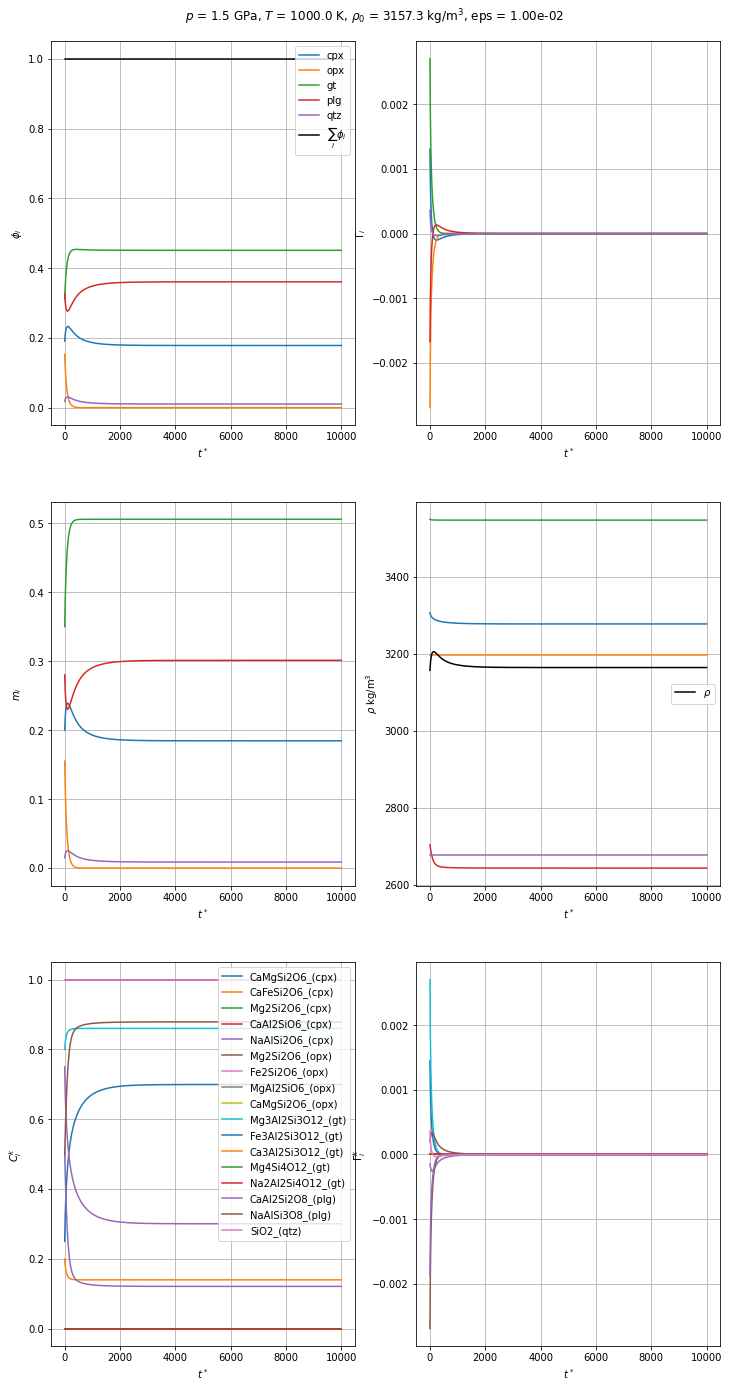

array([0.25, 0.  , 0.  , 0.  , 0.75, 1.  , 0.  , 0.  , 0.  , 0.8 , 0.  ,
       0.2 , 0.  , 0.  , 0.5 , 0.5 , 1.  ])

array([ 6.99648397e-01, -1.36861831e-23, -1.33499873e-23,  0.00000000e+00,
        3.00351603e-01,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.60362196e-01,  0.00000000e+00,  1.39637804e-01,
        0.00000000e+00,  0.00000000e+00,  1.20895953e-01,  8.79104047e-01,
        1.00000000e+00])

array([ 1.84513825e-01, -3.44802516e-15,  5.05606975e-01,  3.01135900e-01,
        8.74329958e-03])

In [11]:
# initial temperature, pressure and phase volume fraction
Ti = 1000.0 # Kelvin
pi = GPa2Bar(1.5) # bars

ode = ScipyPDReactiveODE(rxn)
ode.solve(Ti,pi,mi0,Cik0,10000.0) # T, p, mi0, Cik0, t_end, **kwargs
display(ode.stime)
display(ode.final_phases(1.e-2))
ode.plot()

Cik = ode.sol.y[ode.I:ode.I+ode.K,-1]
mi = ode.sol.y[:ode.I,-1]
display(Cik0)
display(Cik)
display(mi)

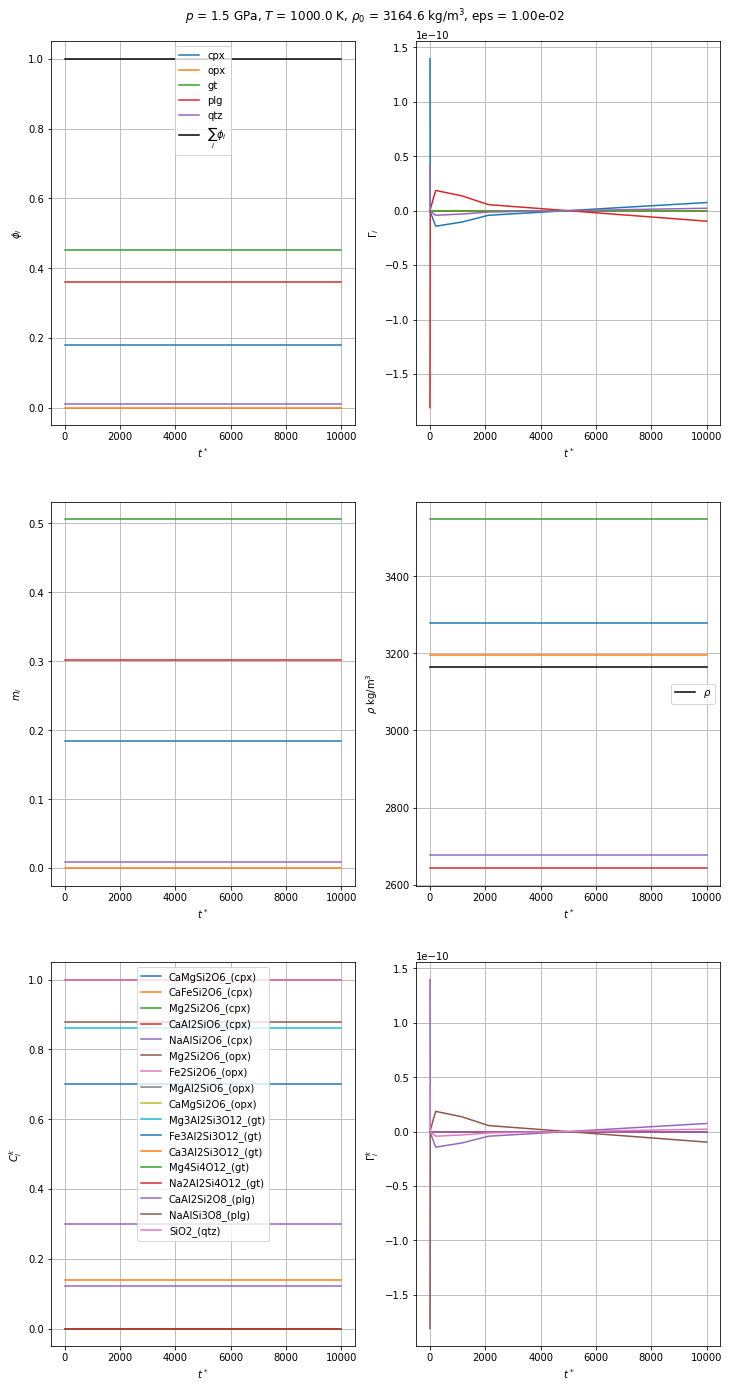

In [12]:
ode.solve(Ti,pi,mi,Cik,10000.0) # T, p, mi0, Cik0, t_end, **kwargs
ode.plot()

In [25]:
reload = False

import pickle

filename = os.path.join('output', 'scipy_bdfgrid_eclogite.pickle')

i0 = 2
p_n = 20
p_min = 0.1
p_max = 2.0
Dp = p_max - p_min
p_range = np.linspace(p_min+0.5*Dp/p_n, p_max-0.5*Dp/p_n, p_n)

T_n = 20
T_min = 500.
T_max = 1200.
DT = T_max - T_min
T_range = np.linspace(T_min+0.5*DT/T_n, T_max-0.5*DT/T_n, T_n)

end = 1e5 # end time

if reload:
    pfile = open(filename, 'rb')
    bdfgrid = pickle.load(pfile)
    pfile.close()
else:
    bdfgrid = PDReactiveGrid()
    bdfgrid.solve(rxn, ScipyPDReactiveODE, i0, ['p', 'T'], p_range, T_range, end, Cik0=Cik0, mi0=mi0)

In [26]:
save = False

if not reload and save:
    pfile = open(filename, 'wb+')
    pickle.dump(bdfgrid, pfile)
    pfile.close()

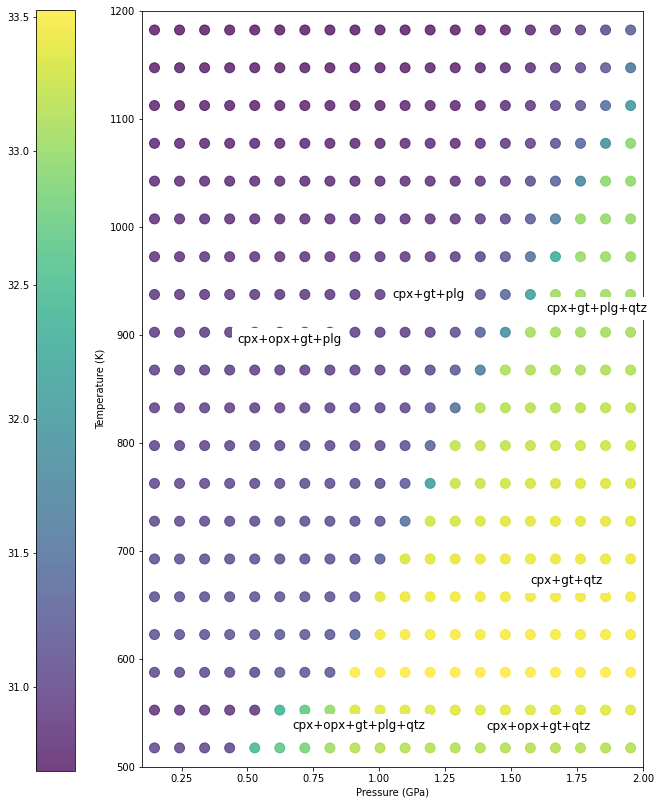

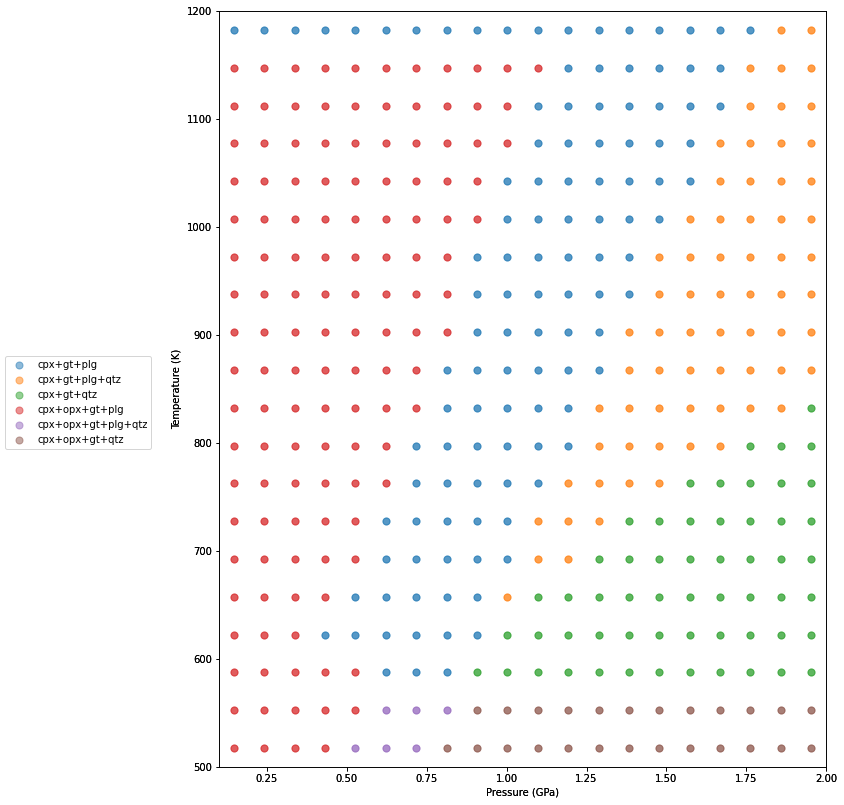

In [27]:
import matplotlib.pyplot as plt

def decorate(pdrgd):
    def new_setup_axes(self,axi):
        axi.axis('off')
        ax = axi.inset_axes([0.001,0.005,0.998,0.993])
        ax.patch.set_alpha(0.0)
        ax.set_xlim([p_min, p_max])
        ax.set_xlabel("Pressure (GPa)")

        ax.set_ylim([T_min, T_max])
        ax.set_ylabel("Temperature (K)")

        return ax
    
    #replace the display with newdisplay
    pdrgd.setup_axes = new_setup_axes
    
    #return the modified student 
    return pdrgd

bdfdiag = decorate(PDReactiveGridDiagnostics)(rxn,bdfgrid) 
s=bdfdiag.plot_rho()
s.set_cmap('viridis')

bdfdiag.plot_phases()